<a href="https://colab.research.google.com/github/Xemarij/Computer-Vision/blob/main/9_Thresholding%2C_Binarization___Adaptive_Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Thresholding, Binarization & Adaptive Thresholding**

####**In this lesson we'll learn:**
1. Binarized Images
2. Thresholding Methods
3. Adaptive Thresholding
4. SkImage's Threshold Local

### **Thresholding Methods**

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Screenshot%202020-11-17%20at%2012.57.55%20am.png)
![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Screenshot%202020-11-17%20at%2012.58.09%20am.png)

https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

In [ ]:
!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg

--2021-11-15 16:58:12--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171933 (168K) [image/jpeg]
Saving to: ‘scan.jpeg’

scan.jpeg           100%[===================>] 167.90K  --.-KB/s    in 0.02s   

2021-11-15 16:58:13 (10.5 MB/s) - ‘scan.jpeg’ saved [171933/171933]



**Use Python cv2 to convert an image to grayscale and then apply binary threshold to covert everything below 125 pixel value to black and make everthing upto 255 white.**

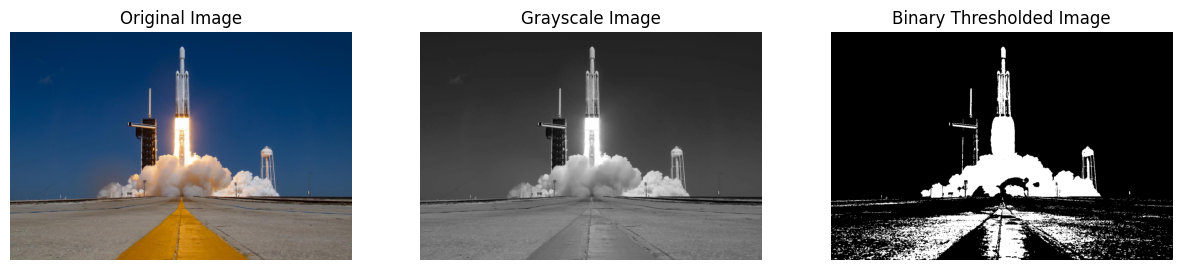

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./images/4.jpg')

# Convert the image from BGR to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
# Everything below 125 will be set to 0 (black), and everything from 125 to 255 will be set to 255 (white)
_, binary_image = cv2.threshold(gray_image, 125, 255, cv2.THRESH_BINARY)

# Display the original, grayscale, and binary thresholded images side by side
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Grayscale image
plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

# Binary thresholded image
plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Thresholded Image")
plt.axis("off")

# Show the images
plt.show()


**Now do the same for Binary inverse, Trunc and TOZERO**

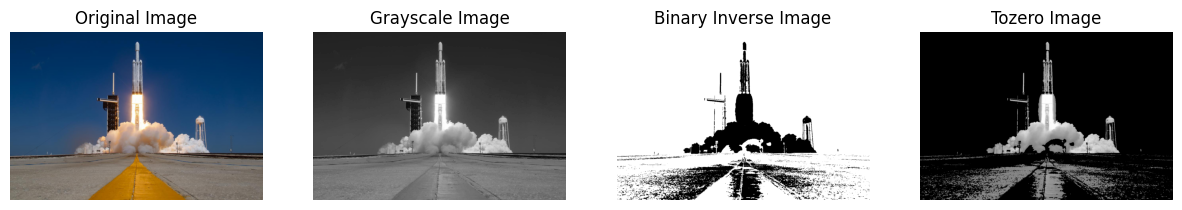

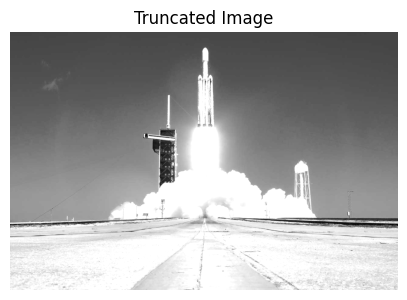

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./images/4.jpg')

# Convert the image from BGR to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary inverse thresholding
_, binary_inverse_image = cv2.threshold(gray_image, 125, 255, cv2.THRESH_BINARY_INV)

# Apply truncation thresholding
_, truncated_image = cv2.threshold(gray_image, 125, 255, cv2.THRESH_TRUNC)

# Apply tozero thresholding
_, tozero_image = cv2.threshold(gray_image, 125, 255, cv2.THRESH_TOZERO)

# Display the original, grayscale, and thresholded images side by side
plt.figure(figsize=(15, 7))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Grayscale image
plt.subplot(1, 4, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

# Binary Inverse image
plt.subplot(1, 4, 3)
plt.imshow(binary_inverse_image, cmap='gray')
plt.title("Binary Inverse Image")
plt.axis("off")

# Tozero image
plt.subplot(1, 4, 4)
plt.imshow(tozero_image, cmap='gray')
plt.title("Tozero Image")
plt.axis("off")

# Show the images
plt.show()

# Display Truncation separately due to space
plt.figure(figsize=(5, 5))
plt.imshow(truncated_image, cmap='gray')
plt.title("Truncated Image")
plt.axis("off")
plt.show()


#### **Adaptive Thresholding**

1. ADAPTIVE_THRESH_MEAN_C
2. THRESH_OTSU

#### **cv2.adaptiveThreshold Parameters**

``**cv2.adaptiveThreshold**(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst``

- **src** – Source 8-bit single-channel image.
- **dst** – Destination image of the same size and the same type as src .
- **maxValue** – Non-zero value assigned to the pixels for which the condition is satisfied. See the details below.
- **adaptiveMethod** – Adaptive thresholding algorithm to use, ADAPTIVE_THRESH_MEAN_C or ADAPTIVE_THRESH_GAUSSIAN_C . See the details below.
- **thresholdType** – Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV .
- **blockSize** – Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
- **C** – Constant subtracted from the mean or weighted mean. Normally, it is positive but may be zero or negative as well.


**Use Python cv2 to apply adaptive threshold mean method after turing an image to grayscale and display the image with matplotlib.**

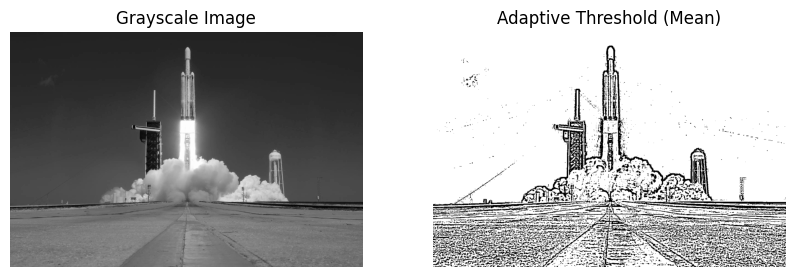

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./images/4.jpg')

# Convert the image from BGR to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding using the mean of the neighborhood area
adaptive_thresholded_image = cv2.adaptiveThreshold(
    gray_image,               # Input image
    255,                      # Maximum value to use with THRESH_BINARY
    cv2.ADAPTIVE_THRESH_MEAN_C,  # Adaptive method
    cv2.THRESH_BINARY,        # Thresholding type
    11,                       # Block size (must be odd)
    2                         # Constant subtracted from the mean
)

# Display the original grayscale image and the adaptive thresholded image
plt.figure(figsize=(10, 5))

# Grayscale image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

# Adaptive thresholded image
plt.subplot(1, 2, 2)
plt.imshow(adaptive_thresholded_image, cmap='gray')
plt.title("Adaptive Threshold (Mean)")
plt.axis("off")

# Show the images
plt.show()


**Use Python cv2 to apply a Otsu method after converting it to grayscale and display the image with matplotlib.**

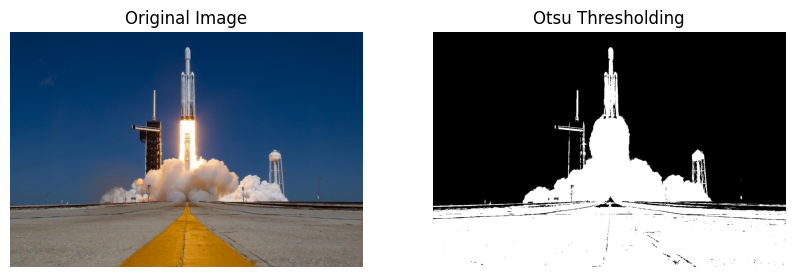

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('./images/4.jpg')

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply Otsu's thresholding
# The second parameter is set to 0 to let Otsu's method find the optimal threshold value
thresh_value, otsu_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 4: Display the images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
plt.axis('off')

# Grayscale image
plt.subplot(1, 2, 2)
plt.title('Otsu Thresholding')
plt.imshow(otsu_image, cmap='gray')  # Display in grayscale
plt.axis('off')

plt.show()


**Use Python cv2 guasssian otsu method on a grayscale image and display the image with matplotlib.**

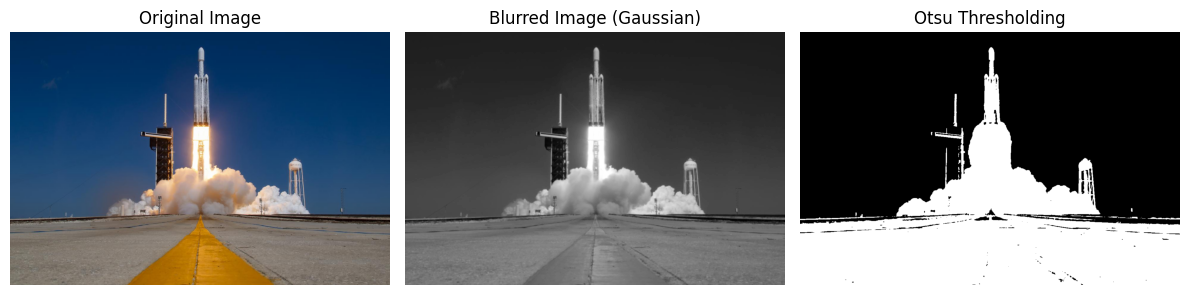

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('./images/4.jpg')

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply Gaussian blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Step 4: Apply Otsu's thresholding
thresh_value, otsu_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 5: Display the images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
plt.axis('off')

# Grayscale image
plt.subplot(1, 3, 2)
plt.title('Blurred Image (Gaussian)')
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

# Otsu Thresholding
plt.subplot(1, 3, 3)
plt.title('Otsu Thresholding')
plt.imshow(otsu_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### **SkImage Threshold Local**


``threshold_local(image, block_size, offset=10)``

The threshold_local function, calculates thresholds in regions with a characteristic size ``block_size`` surrounding each pixel (i.e. local neighborhoods). Each threshold value is the weighted mean of the local neighborhood minus an ``offset`` value


https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html

**Use Python cv2 SKimage threshold local method after converting an image to grayscale and display the image with matplolib.**

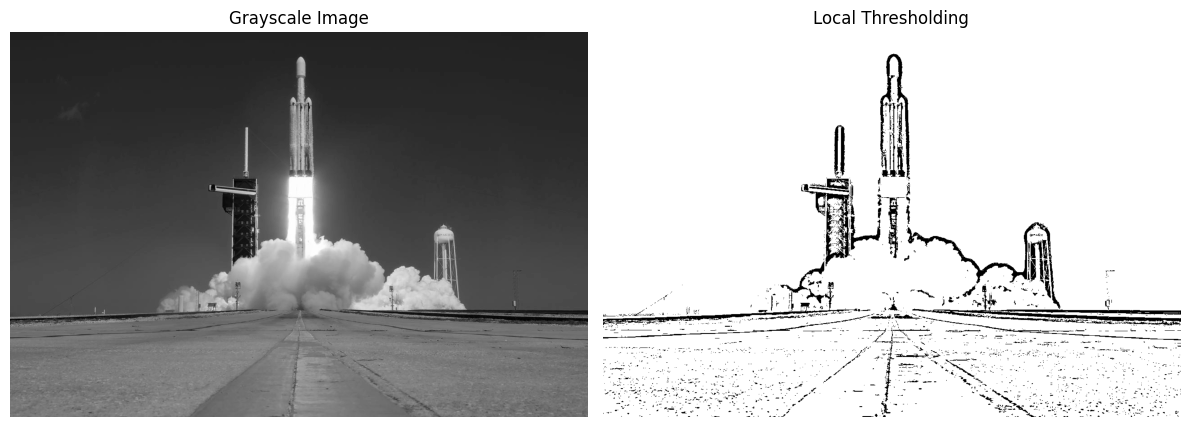

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

# Step 1: Load the image
image = cv2.imread('./images/4.jpg')

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply local thresholding
# Block size determines the size of the region to calculate the threshold for each pixel
block_size = 35  # You can adjust this value
local_thresh = threshold_local(gray_image, block_size, offset=10)
binary_local = gray_image > local_thresh  # Create a binary image

# Step 4: Display the images
plt.figure(figsize=(12, 6))

# Grayscale image
plt.subplot(1, 2, 1)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

# Local thresholding result
plt.subplot(1, 2, 2)
plt.title('Local Thresholding')
plt.imshow(binary_local, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


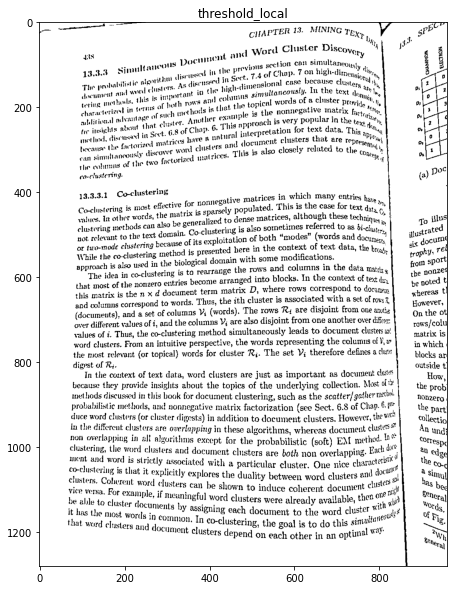

In [ ]:
from skimage.filters import threshold_local

image = cv2.imread('scan.jpeg')

# We get the Value component from the HSV color space
# then we apply adaptive thresholdingto
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Apply the threshold operation
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh)

### **Why Bluring is Important before Thresholding?**

## **Answer - Noise**

![](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/otsu.jpg)

https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html